#### Importando as blibliotecas

In [3]:
## Libs de tratamento e visualização de graficos
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [4]:
## Libs para os modelos de regressão.

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#### 1 - Análise descritiva

In [100]:
df = pd.read_csv("preco_carro.csv")

In [101]:
df.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [102]:
## Verificando se tem algum valor NaN para tratar 
df.isna().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [103]:
## Verificando se tem algum valor vazio.
df.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [105]:
df.describe()

v.id    on road old  on road now        years             km  \
count  1000.000000    1000.000000    1000.0000  1000.000000    1000.000000   
mean    500.500000  601648.286000  799131.3970     4.561000  100274.430000   
std     288.819436   58407.246204   57028.9502     1.719079   29150.463233   
min       1.000000  500265.000000  700018.0000     2.000000   50324.000000   
25%     250.750000  548860.500000  750997.7500     3.000000   74367.500000   
50%     500.500000  601568.000000  798168.0000     5.000000  100139.500000   
75%     750.250000  652267.250000  847563.2500     6.000000  125048.000000   
max    1000.000000  699859.000000  899797.0000     7.000000  149902.000000   

            rating    condition      economy   top speed          hp  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.00000   
mean      2.988000     5.592000    11.625000   166.89300    84.54600   
std       1.402791     2.824449     2.230549    19.28838    20.51694   
min       1.000000     1.000000     8.000000   135.00000    50.00000   
25%       2.000000     3.000000    10.000000   150.00000    67.00000   
50%       3.000000     6.000000    12.000000   166.00000    84.00000   
75%       4.000000     8.000000    13.000000   184.00000   102.00000   
max       5.000000    10.000000    15.000000   200.00000   120.00000   

            torque  current price  
count  1000.000000     1000.00000  
mean    103.423000   308520.24250  
std      21.058716   126073.25915  
min      68.000000    28226.50000  
25%      85.000000   206871.75000  
50%     104.000000   306717.75000  
75%     121.000000   414260.87500  
max     140.000000   584267.50000

In [106]:
df[["on road old", "on road now", "km", "current price"]]

on road old  on road now      km  current price
0         535651       798186   78945       351318.0
1         591911       861056  117220       285001.5
2         686990       770762  132538       215386.0
3         573999       722381  101065       244295.5
4         691388       811335   61559       531114.5
..           ...          ...     ...            ...
995       633238       743850  125092       190744.0
996       599626       848195   83370       419748.0
997       646344       842733   86722       405871.0
998       535559       732439  140478        74398.0
999       590105       779743   67295       414938.5

[1000 rows x 4 columns]

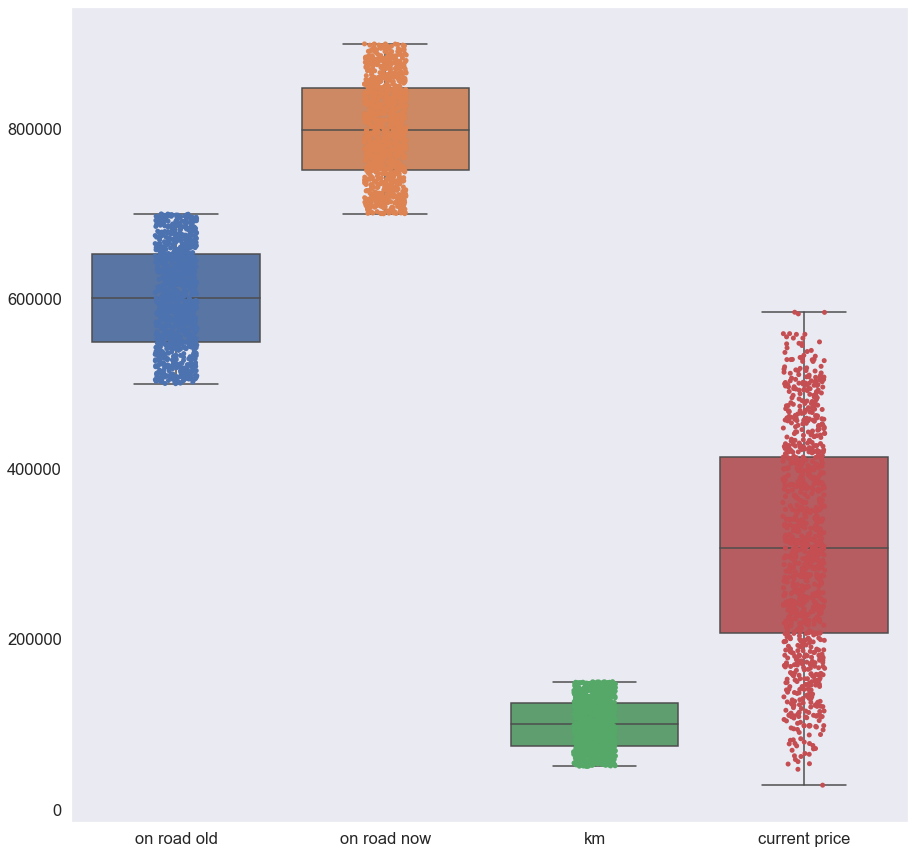

In [107]:
## Grafico box plot para análisar os outliers
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=df[["on road old", "on road now", "km", "current price"]])
sns.stripplot(data=df[["on road old", "on road now", "km", "current price"]])

plt.show()

Peguei apenas as variáveis com maior relevância e que possivelmente podia ter outliers e que não foi encontrado.

<Figure size 864x864 with 0 Axes>

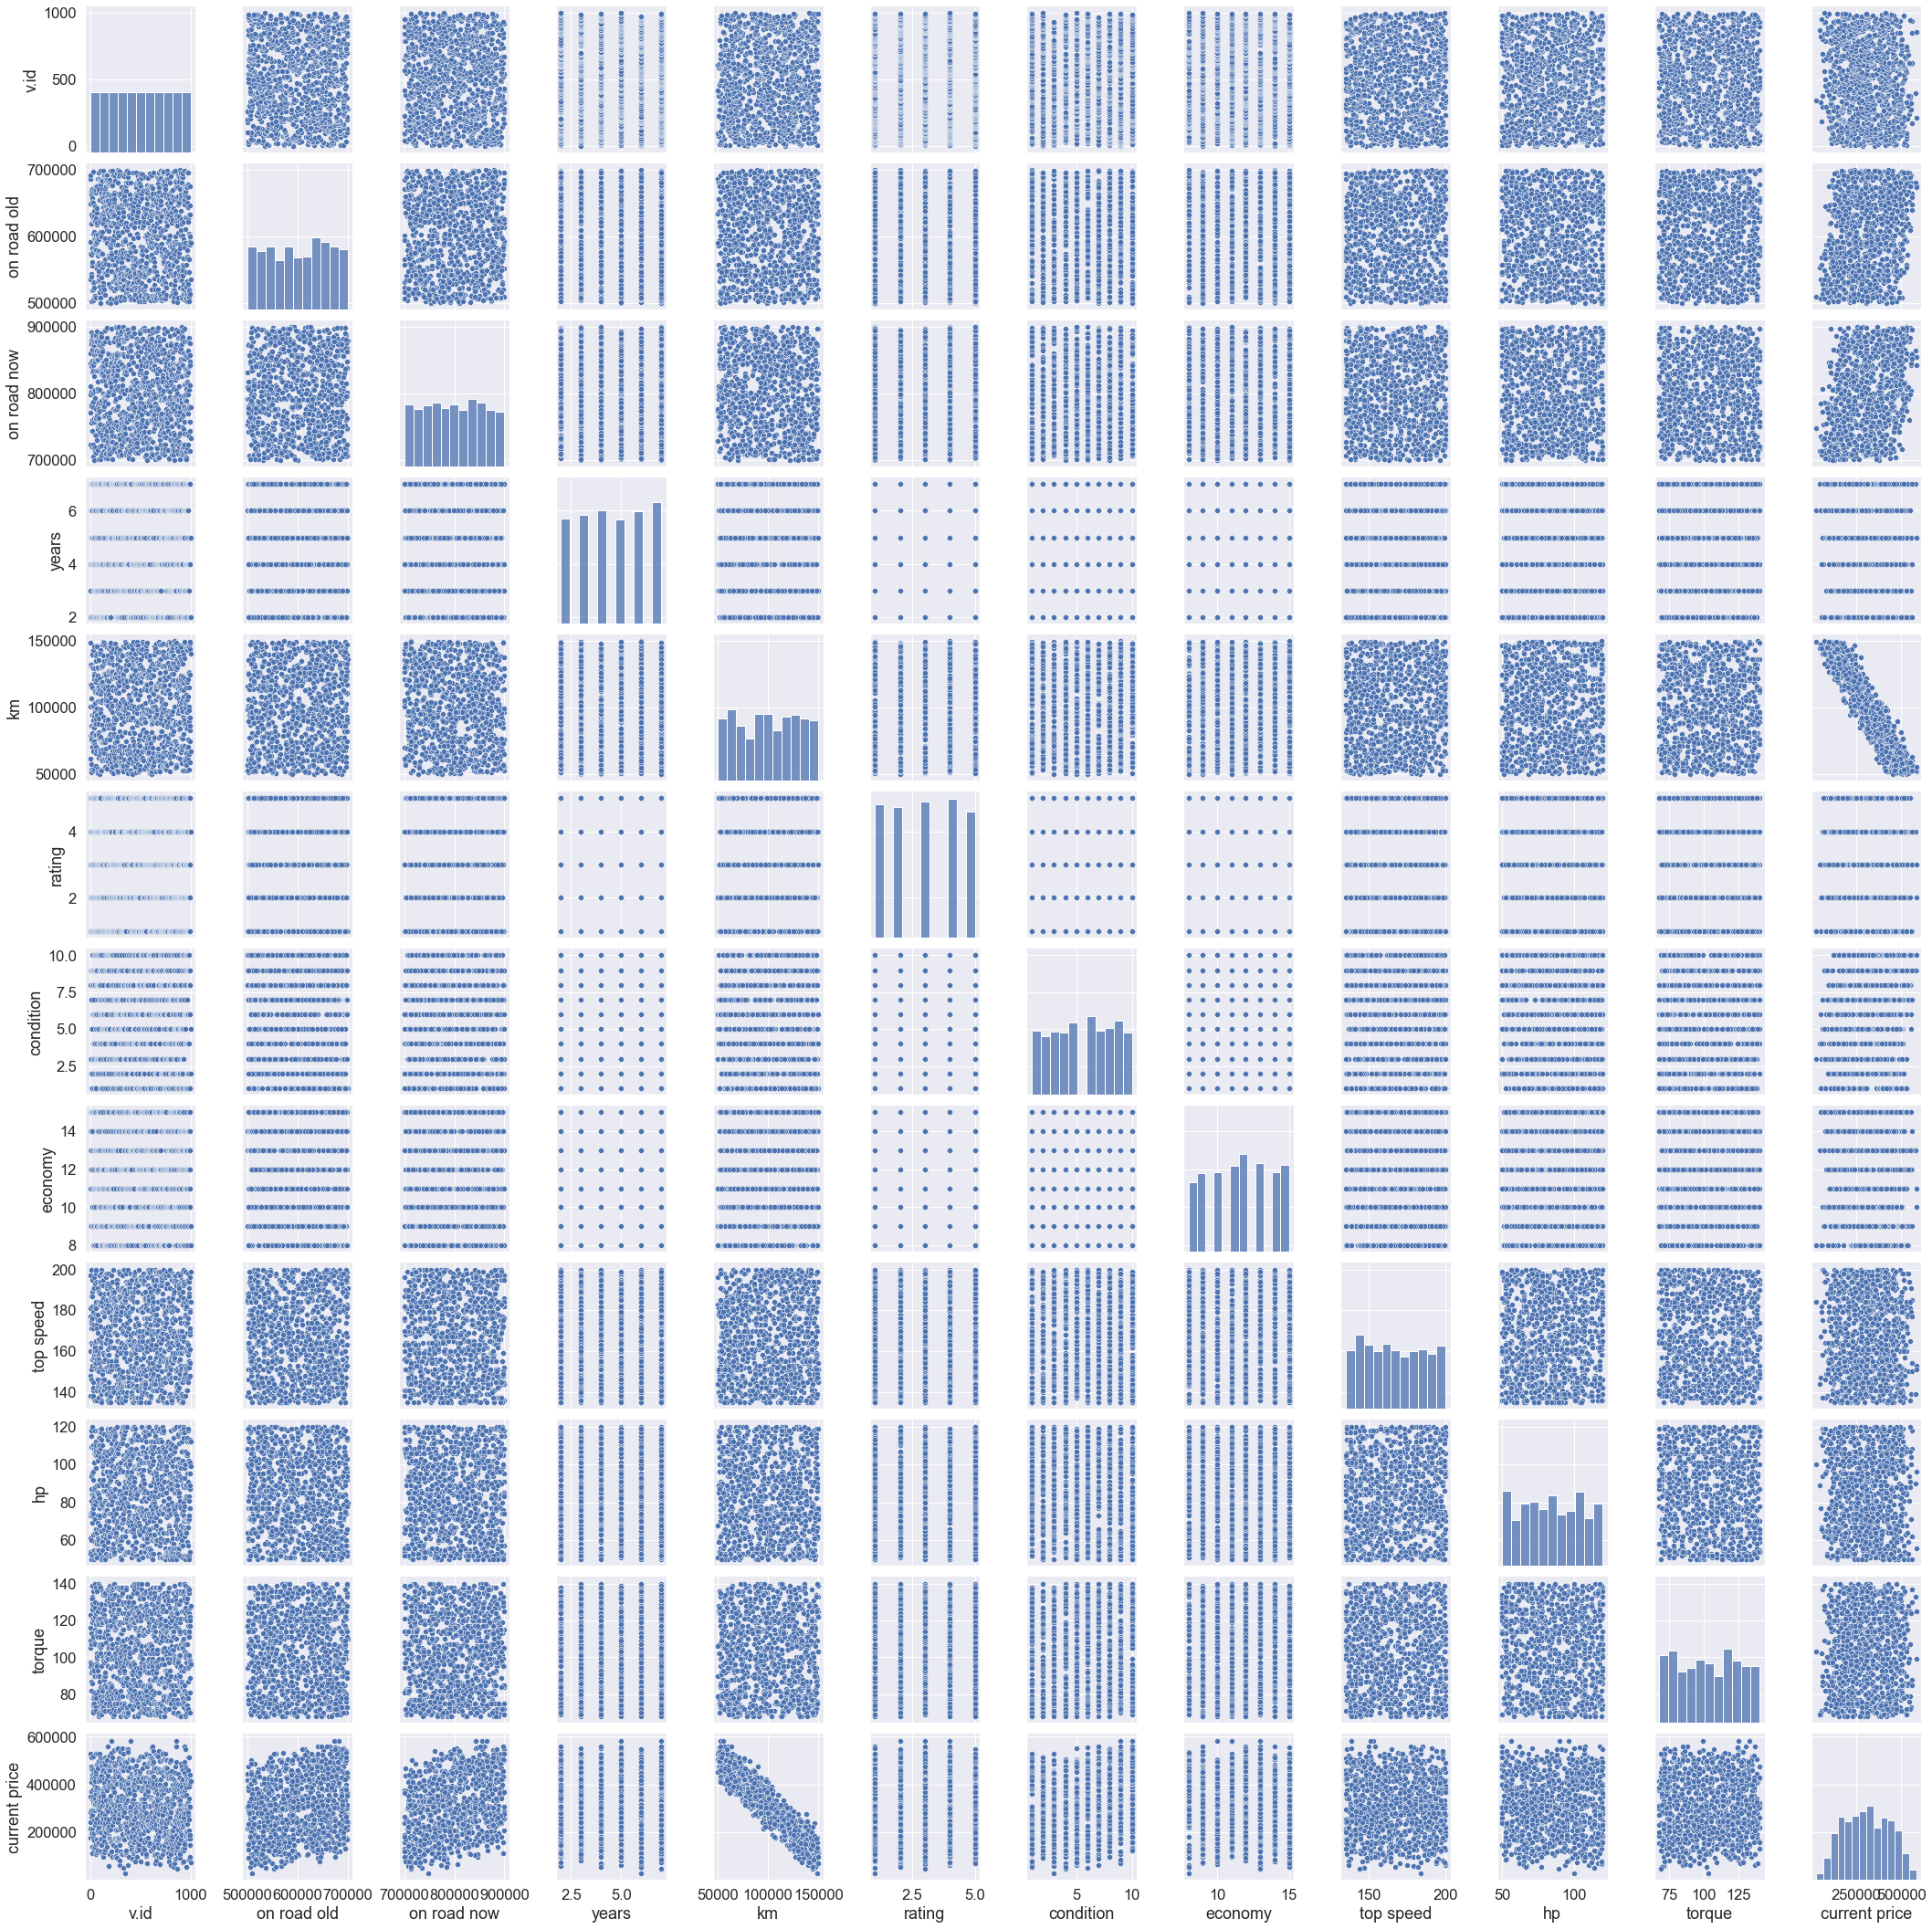

In [108]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,12))
sns.pairplot(df)
plt.show()

Dá para notar uma relação linear negativa entre km e o preço, ou seja quanto mais km rodados do carro menor o preço. $\newline$
Também notamos outra relação linear entre a variável on road old com o preço.

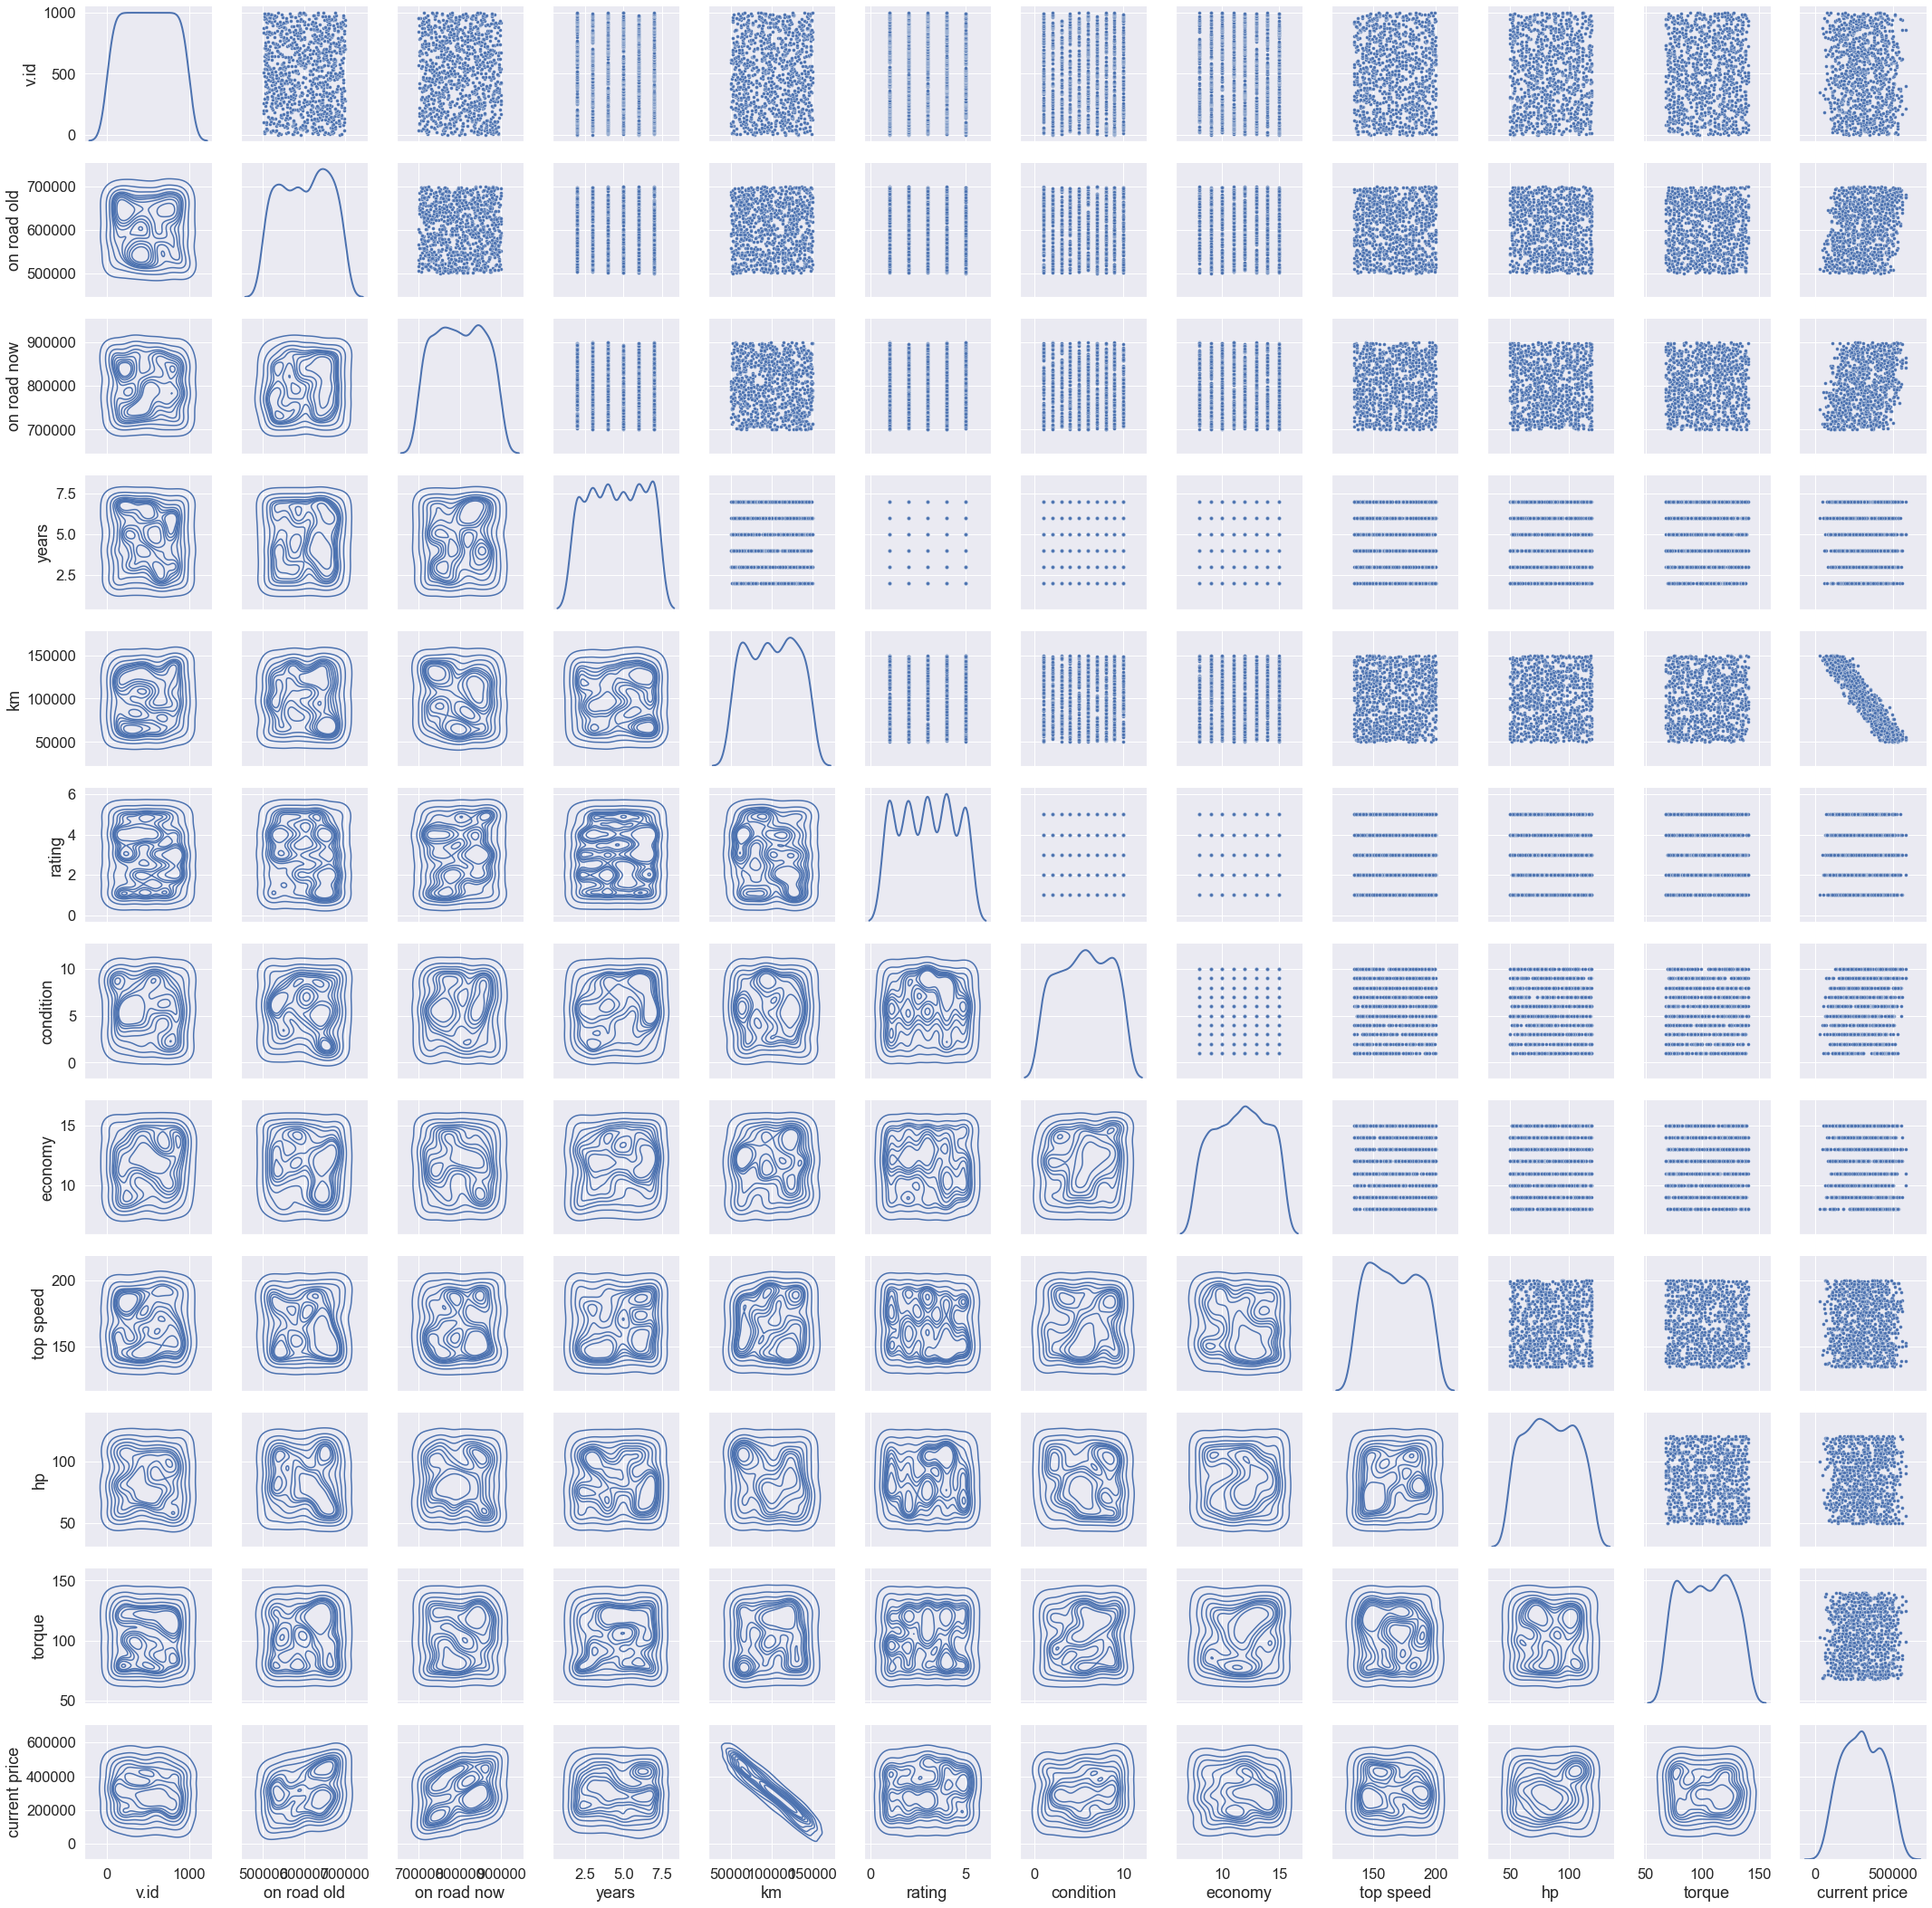

In [109]:
graph = sns.PairGrid(df, diag_sharey=False)
graph.map_upper(sns.scatterplot, s=15)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot, lw=2)

#### 2 - Calculo da correlação e covariância

In [110]:
matrix_corr = df.corr()
matrix_cov = df.cov()

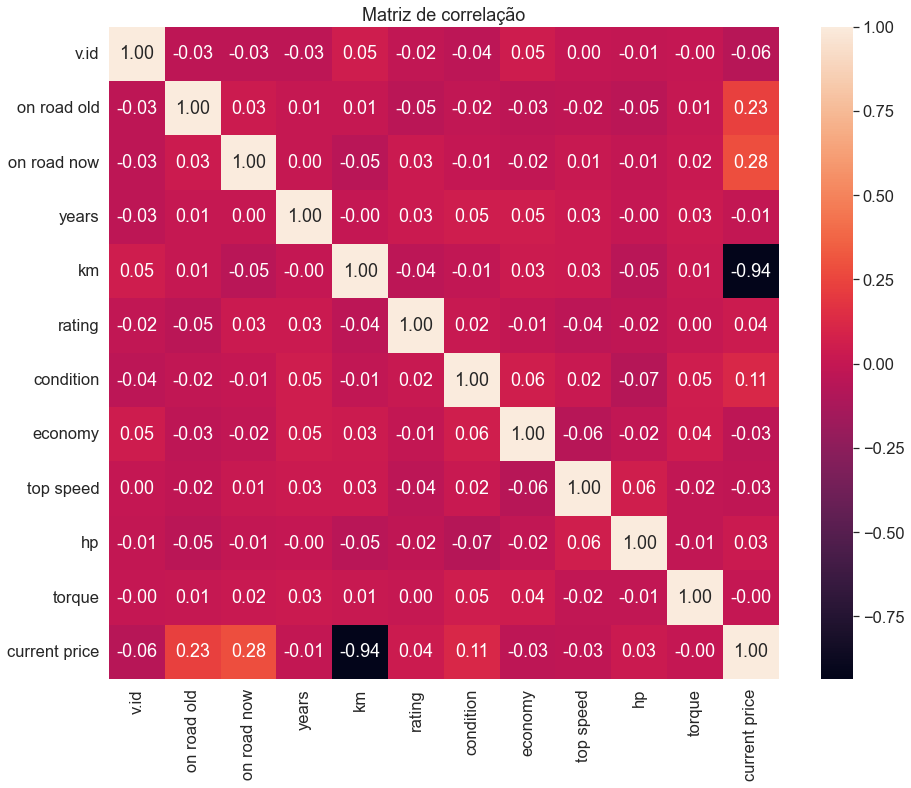

In [111]:
plt.figure(figsize=(15,12))
plt.title("Matriz de correlação")
sns.heatmap(matrix_corr, annot=True, fmt=".2f")
plt.show()

In [112]:
matrix_cov

v.id   on road old   on road now        years  \
v.id           8.341667e+04 -5.048332e+05 -5.070998e+05   -17.007508   
on road old   -5.048332e+05  3.411406e+09  1.136275e+08   723.631185   
on road now   -5.070998e+05  1.136275e+08  3.252301e+09   451.837120   
years         -1.700751e+01  7.236312e+02  4.518371e+02     2.955234   
km             3.990728e+05  1.274980e+07 -8.844456e+07  -104.694925   
rating        -7.399399e+00 -4.155436e+03  2.262387e+03     0.065798   
condition     -3.144545e+01 -2.587026e+03 -8.123824e+02     0.260148   
economy        3.036687e+01 -3.921006e+03 -2.020082e+03     0.192568   
top speed      8.988488e+00 -2.683035e+04  1.396929e+04     0.833861   
hp            -4.146346e+01 -5.903769e+04 -1.488256e+04    -0.115421   
torque        -3.846346e+00  1.100869e+04  2.156360e+04     1.044742   
current price -2.165096e+06  1.715974e+09  2.033231e+09 -2569.170213   

                         km       rating     condition      economy  \
v.id           3.990728e+05    -7.399399    -31.445445    30.366867   
on road old    1.274980e+07 -4155.436004  -2587.026338 -3921.005756   
on road now   -8.844456e+07  2262.387151   -812.382406 -2020.082207   
years         -1.046949e+02     0.065798      0.260148     0.192568   
km             8.497495e+08 -1632.826667  -1123.013574  2124.906156   
rating        -1.632827e+03     1.967824      0.063167    -0.030531   
condition     -1.123014e+03     0.063167      7.977514     0.370370   
economy        2.124906e+03    -0.030531      0.370370     4.975350   
top speed      1.487207e+04    -1.142426      1.006350    -2.555681   
hp            -3.164936e+04    -0.651099     -4.146378    -0.768018   
torque         8.327857e+03     0.130206      2.843427     1.955581   
current price -3.439609e+09  6196.545956  39208.230170 -9761.050613   

                  top speed            hp        torque  current price  
v.id               8.988488    -41.463463     -3.846346  -2.165096e+06  
on road old   -26830.347746 -59037.689846  11008.687710   1.715974e+09  
on road now    13969.286766 -14882.559321  21563.603673   2.033231e+09  
years              0.833861     -0.115421      1.044742  -2.569170e+03  
km             14872.065075 -31649.363143   8327.856967  -3.439609e+09  
rating            -1.142426     -0.651099      0.130206   6.196546e+03  
condition          1.006350     -4.146378      2.843427   3.920823e+04  
economy           -2.555681     -0.768018      1.955581  -9.761051e+03  
top speed        372.041593     22.884306     -8.000740  -6.807131e+04  
hp                22.884306    420.944829     -5.969928   7.821565e+04  
torque            -8.000740     -5.969928    443.469541  -6.079438e+03  
current price -68071.307360  78215.648744  -6079.437515   1.589447e+10

Aparentemente tivemos problema nas variáveis no data frame então vou fazer uma transformação nelas apenas para calcular a covariância. Vou utilizar o standerScaler para escalonizalas dada pela função :
$$ Z = \frac{x - \mu}{\sigma}$$

In [118]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

matrix_cov = np.cov(df_scale, rowvar=False) ## Aqui ele vai vir como uma class do numpy


In [128]:
matrix_cov = pd.DataFrame(matrix_cov, columns=df.columns)

matrix_cov.head()

v.id  on road old  on road now     years        km    rating  \
0  1.001001    -0.029956    -0.030818 -0.034289  0.047448 -0.018281   
1 -0.029956     1.001001     0.034147  0.007214  0.007496 -0.050768   
2 -0.030818     0.034147     1.001001  0.004613 -0.053256  0.028308   
3 -0.034289     0.007214     0.004613  1.001001 -0.002091  0.027312   
4  0.047448     0.007496    -0.053256 -0.002091  1.001001 -0.039970   

   condition   economy  top speed        hp    torque  current price  
0  -0.038586  0.047184   0.001615 -0.007004 -0.000633      -0.059520  
1  -0.015698 -0.030127  -0.023840 -0.049316  0.008959       0.233268  
2  -0.005049 -0.015896   0.012712 -0.012732  0.017973       0.283076  
3   0.053632  0.050270   0.025173 -0.003276  0.028888      -0.011866  
4  -0.013653  0.032713   0.026477 -0.052971  0.013580      -0.936861

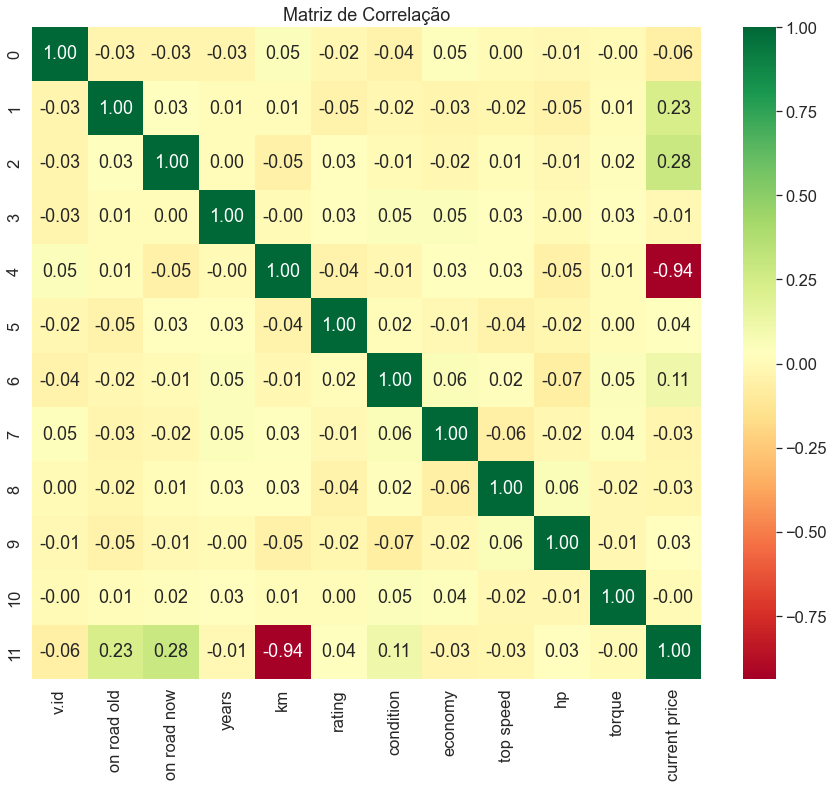

In [129]:
plt.figure(figsize=(15, 12))
sns.heatmap(matrix_cov, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Aqui vemos uma covâriancia negatia entre a kilometragem e o preço já visto antes dentro da correlação.

As variáveis que decidi escolher foi km, years, on road now, e on road old, e condition. Depois análisamos se podemos diminuir essa quantidade de variáveis.

#### 3 - Modelos de regressão

In [131]:
df.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [139]:
for i in df.columns:
    df.rename(columns={i: i.replace(" ", "_").replace(" ", "_")}, inplace=True)

In [140]:
df.columns

Index(['v.id', 'on_road_old', 'on_road_now', 'years', 'km', 'rating',
       'condition', 'economy', 'top_speed', 'hp', 'torque', 'current_price'],
      dtype='object')

In [152]:
X = df[["on_road_old", "on_road_now", "years", "km", "condition"]]
y = df["current_price"]

In [154]:
modelo1 = smf.ols("current_price ~ on_road_old + on_road_now + years + km + condition", data=df)
modelo2 = LinearRegression()

In [155]:
modelo1 = modelo1.fit()
modelo2 = modelo2.fit(X, y)

In [158]:
residuos1 = modelo1.resid
residuos2 = y - modelo2.predict(X)

In [159]:
residuos1

0      5414.228666
1      4748.487811
2     -8350.122012
3      2358.413275
4      2982.442881
          ...     
995   -8050.897173
996    3483.058863
997   -8388.535251
998   -8077.719236
999    7418.876633
Length: 1000, dtype: float64

In [160]:
residuos2

0      5414.228666
1      4748.487811
2     -8350.122012
3      2358.413275
4      2982.442881
          ...     
995   -8050.897172
996    3483.058863
997   -8388.535251
998   -8077.719236
999    7418.876633
Name: current_price, Length: 1000, dtype: float64

In [161]:
## so vendo se os modelos sao iguais
print(residuos1 - residuos2)

0      3.376044e-09
1     -1.338776e-09
2     -8.090865e-09
3     -6.228220e-09
4      1.420267e-08
           ...     
995   -9.342330e-09
996    7.334165e-09
997    7.741619e-09
998   -1.749140e-08
999    7.101335e-09
Length: 1000, dtype: float64


#### 4 – análise dos resíduos
Teste de normalidade dos resíduos que é definida por:
$$ 
 \left\{\begin{matrix}
    H_0 = & \text{Distribuição normal}, & p > 0.05\\ 
    H_1 \neq  &  \text{Distribuição  normal}, & p \leq 0.05\\
\end{matrix}\right.
$$


In [37]:
import scipy.stats as st
from statsmodels.compat import lzip

In [163]:
estatistica1, p1 = st.shapiro(residuos1) ## modelo estatistico
estatistica2, p2 = st.shapiro(residuos2) ## modelos ml

In [164]:
print("Estatística de teste do modelo 1 : {}".format(estatistica1))
print("p-valor do modelo 1: {}".format(p1))

Estatística de teste do modelo 1 : 0.9207471013069153
p-valor do modelo 1: 1.7120169860758693e-22


In [165]:
print("Estatística de teste do modelo 2 : {}".format(estatistica2))
print("p-valor do modelo 2: {}".format(p2))

Estatística de teste do modelo 2 : 0.9207471013069153
p-valor do modelo 2: 1.7120169860758693e-22


Os risiduos possuem distribuição normal

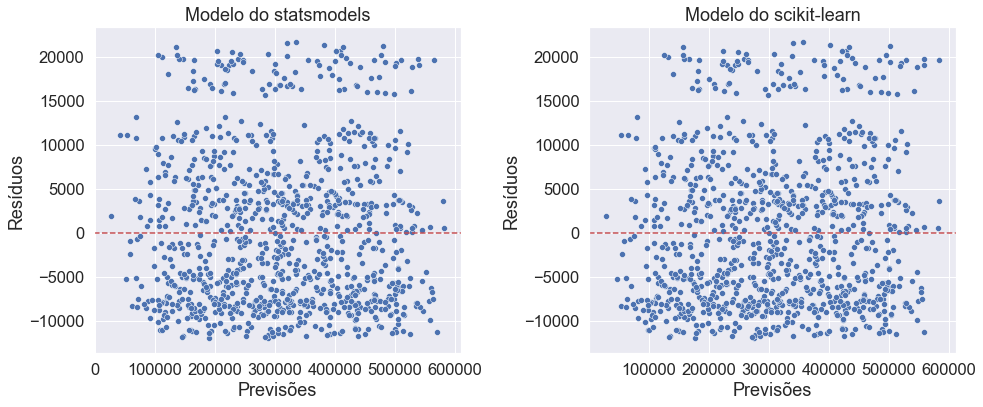

In [166]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(modelo1.fittedvalues, residuos1)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.title("Modelo do statsmodels")

# Gráfico para o modelo do scikit-learn
plt.subplot(1, 2, 2)
sns.scatterplot(y, residuos2)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.title("Modelo do scikit-learn")

plt.tight_layout()
plt.show()

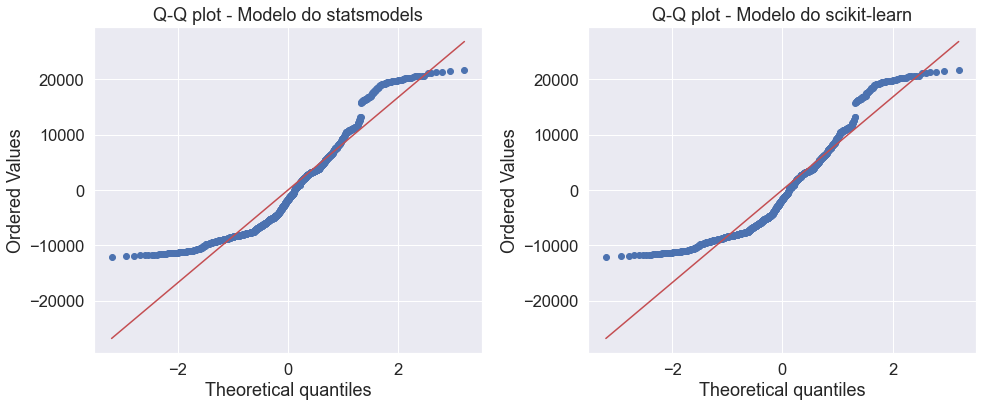

In [168]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
st.probplot(residuos1, dist="norm", plot=plt)
plt.title("Q-Q plot - Modelo do statsmodels")

# Q-Q plot para os resíduos do modelo do scikit-learn
plt.subplot(1, 2, 2)
st.probplot(residuos2, dist="norm", plot=plt)
plt.title("Q-Q plot - Modelo do scikit-learn")

plt.tight_layout()
plt.show()

**Agora vamos análisar a Homocedasticidade ou heterocedasticidade**

##### Teste Breusch-Pagan que e dada por:

$$
\left\{\begin{matrix}
 H_0 = & \text{Homocedasticidade}, & p > 0.05\\ 
 H_1 \neq  &  \text{Homocedasticidade}, & p \leq 0.05\\
\end{matrix}\right.
$$

In [171]:
modelo1.model.exog

array([[1.00000e+00, 5.35651e+05, 7.98186e+05, 3.00000e+00, 7.89450e+04,
        2.00000e+00],
       [1.00000e+00, 5.91911e+05, 8.61056e+05, 6.00000e+00, 1.17220e+05,
        9.00000e+00],
       [1.00000e+00, 6.86990e+05, 7.70762e+05, 2.00000e+00, 1.32538e+05,
        8.00000e+00],
       ...,
       [1.00000e+00, 6.46344e+05, 8.42733e+05, 7.00000e+00, 8.67220e+04,
        8.00000e+00],
       [1.00000e+00, 5.35559e+05, 7.32439e+05, 2.00000e+00, 1.40478e+05,
        5.00000e+00],
       [1.00000e+00, 5.90105e+05, 7.79743e+05, 5.00000e+00, 6.72950e+04,
        2.00000e+00]])

In [170]:
estatistica1, p1, f1, fp1 = sms.het_breuschpagan(residuos1, modelo1.model.exog)


In [172]:
estatistica2, p2, f2, fp2 = sms.het_breuschpagan(residuos2, X)

In [174]:
print("--------------------Modelo 1----------------")
print("Estatística de teste : {}".format(estatistica1))
print("p-valor: {}".format(p1))
print("f-valor: {}".format(f1))
print("f_p-valor: {}".format(fp1))

--------------------Modelo 1----------------
Estatística de teste : 154.61520207424394
p-valor: 1.3894137331477898e-31
f-valor: 36.359184891634584
f_p-valor: 2.881369715345449e-34


In [173]:
print("--------------------Modelo 2----------------")
print("Estatística de teste : {}".format(estatistica2))
print("p-valor: {}".format(p2))
print("f-valor: {}".format(f2))
print("f_p-valor: {}".format(fp2))

--------------------Modelo 2----------------
Estatística de teste : 476.7531824231661
p-valor: 7.135813651529222e-102
f-valor: 181.3176499411365
f_p-valor: 3.152050702817391e-137


Aqui notamos uma grande difenreça nos valores p e os dois modelos são Homocedasticidade

#### 5 – Análise de multicolinearidade
Utilizaremos o fator VIF que é dada por :
$$VIF_j = \frac{1}{1 - R^2_j}$$

In [201]:
df_cols = df.iloc[:,1:11]

In [202]:
X

on_road_old  on_road_now  years      km  condition
0         535651       798186      3   78945          2
1         591911       861056      6  117220          9
2         686990       770762      2  132538          8
3         573999       722381      4  101065          3
4         691388       811335      6   61559          9
..           ...          ...    ...     ...        ...
995       633238       743850      5  125092          6
996       599626       848195      4   83370          9
997       646344       842733      7   86722          8
998       535559       732439      2  140478          5
999       590105       779743      5   67295          2

[1000 rows x 5 columns]

In [204]:
vif = add_constant(
    df_cols
)  # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series(
    [variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])],
    index=vif.columns,
)

const          479.327661
on_road_old      1.008517
on_road_now      1.005861
years            1.007445
km               1.009872
rating           1.008609
condition        1.014647
economy          1.013642
top_speed        1.012291
hp               1.015192
torque           1.005507
dtype: float64

In [205]:
vif = add_constant(
    X
)  # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series(
    [variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])],
    index=vif.columns,
)

const          322.001282
on_road_old      1.001552
on_road_now      1.004086
years            1.002967
km               1.003118
condition        1.003350
dtype: float64

Portanto com base nesses valores parece que há multicolinearidade entre as contastes e outras variaveis independentes, mas não há multicolinearidade entre as outras variaveis independentes. $\newline$
E como podemos notar nossos modelos 1 e modelo 2 tem menos variaveis isso reflete completamente no ajuste do modelo em si, e isso influência diretamente no modelo mais parcimonioso. 

#### 6 – Análise de outlier

**Outiliers nos resíduos**

Valores entre (-3 , 3)

In [230]:
## Recriei a funcao de outlier_test
def outlier_test(resid, mse, ala):
    from scipy.stats import t
    
    ##  n 
    n = len(resid)
    ## t valores 
    t_values = resid / np.sqrt(mse * (1 - ala))
    
    ## Calculando p valor
    p = 2 * (1 - t.cdf(np.abs(t_values), df=n-1))

    return t_values, p


In [207]:
outliers1 = modelo1.outlier_test()

In [210]:
outliers1.min()

student_resid   -1.383560
unadj_p          0.012361
bonf(p)          1.000000
dtype: float64

In [213]:
outliers1.max()

student_resid    2.506235
unadj_p          0.999661
bonf(p)          1.000000
dtype: float64

In [226]:
from sklearn.metrics import mean_squared_error


y_pred = modelo2.predict(X)
mse = mean_squared_error(y, y_pred)

X_array = X.values

## Matrix alavancagem do modelo
ala = np.diag(X_array @ np.linalg.inv(X_array.T @ X_array) @ X_array.T)

t_valeus, p_values = outlier_test(residuos2, mse, ala)


In [238]:
limit_p = 0.05

id_p_menor = np.where(p_values < limit_p)[0]
id_p_maior = np.where(p_values >= limit_p)[0]

t_menor_lim = t_valeus[id_p_menor]
t_maior_lim = t_valeus[id_p_maior]


print(f" Para p < {limit_p}")
print(f" Maximo valor de t: {t_maior_lim.max()}")
print(f" Minimo valor de t: {t_menor_lim.max()}")
print("----------------------------------------")
print(f" Para p >= {limit_p}:")
print(f" Máximo valor de t: {t_menor_lim.min()}")
print(f" Mínimo valor de t: {t_maior_lim.min()}")

 Para p < 0.05
 Maximo valor de t: 1.9606833542491224
 Minimo valor de t: 2.503815610237305
----------------------------------------
 Para p >= 0.05:
 Máximo valor de t: 1.9643185654983395
 Mínimo valor de t: -1.3870911443910345


#### 7 - seleção de modelos
Decidi usar o StepWise

In [241]:
def calculate_aic(model, X, y):
    from sklearn.metrics import mean_squared_error
    n = len(y)
    k = X.shape[1] + 1  # número de parâmetros, incluindo o intercepto
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    aic = n * np.log(mse) + 2 * k
    return aic

In [243]:
def forward_backward_stepwise_selection(X, y):
    selected_features = []  # lista vazia que armazenará as variáveis selecionadas
    stepwise_model = LinearRegression()  # modelo de regressão a ser usado
    best_aic = float("inf")  # variável que armazenará o melhor AIC
    # (lembrando que quanto menor o AIC, melhor o modelo)

    # Passo Forward
    while (
        True
    ):  # Este loop continua até que não haja mais variáveis para serem testadas.
        features_to_test = [
            feature for feature in X.columns if feature not in selected_features
        ]
        if (
            not features_to_test
        ):  # Lista das variáveis que ainda não foram selecionadas.
            break

        best_feature = None
        best_model = None
        best_aic_with_new_feature = float("inf")

        # Para cada variável em features_to_test, o modelo linear é ajustado utilizando essa variável em
        # conjunto com as variáveis já selecionadas.
        for feature in features_to_test:
            # Ajusta o modelo com a nova variável adicionada
            features_selected = selected_features + [feature]
            stepwise_model.fit(X[features_selected], y)
            # Calcula o AIC
            aic = calculate_aic(stepwise_model, X[features_selected], y)
            # Seleciona a variável com menor AIC
            if aic < best_aic_with_new_feature:
                best_aic_with_new_feature = aic
                best_feature = feature
                best_model = stepwise_model

        if best_aic_with_new_feature >= best_aic:
            break

        selected_features.append(best_feature)
        best_aic = best_aic_with_new_feature

    # Passo Backward
    while True:
        if not selected_features:
            break

        worst_feature = None
        worst_model = None
        best_aic_without_feature = float("inf")

        for feature in selected_features:
            # Ajusta o modelo sem a variável atual
            features_removed = [f for f in selected_features if f != feature]
            stepwise_model.fit(X[features_removed], y)
            # Calcula o AIC
            aic = calculate_aic(stepwise_model, X[features_removed], y)
            # Seleciona a variável com menor AIC
            if aic < best_aic_without_feature:
                best_aic_without_feature = aic
                worst_feature = feature
                worst_model = stepwise_model

        if best_aic_without_feature >= best_aic:
            break

        selected_features.remove(worst_feature)
        best_aic = best_aic_without_feature

    return selected_features

In [246]:
df.current_price

0      351318.0
1      285001.5
2      215386.0
3      244295.5
4      531114.5
         ...   
995    190744.0
996    419748.0
997    405871.0
998     74398.0
999    414938.5
Name: current_price, Length: 1000, dtype: float64

In [248]:
newX = df.drop("current_price", axis=1)
newX

v.id  on_road_old  on_road_now  years      km  rating  condition  \
0       1       535651       798186      3   78945       1          2   
1       2       591911       861056      6  117220       5          9   
2       3       686990       770762      2  132538       2          8   
3       4       573999       722381      4  101065       4          3   
4       5       691388       811335      6   61559       3          9   
..    ...          ...          ...    ...     ...     ...        ...   
995   996       633238       743850      5  125092       1          6   
996   997       599626       848195      4   83370       2          9   
997   998       646344       842733      7   86722       1          8   
998   999       535559       732439      2  140478       4          5   
999  1000       590105       779743      5   67295       4          2   

     economy  top_speed   hp  torque  
0         14        177   73     123  
1          9        148   74      95  
2         15        181   53      97  
3         11        197   54     116  
4         12        160   53     105  
..       ...        ...  ...     ...  
995       11        171   95      97  
996       14        161  101     120  
997        9        196  113      89  
998        9        184  112     128  
999        8        199   99      96  

[1000 rows x 11 columns]

In [249]:
y

0      351318.0
1      285001.5
2      215386.0
3      244295.5
4      531114.5
         ...   
995    190744.0
996    419748.0
997    405871.0
998     74398.0
999    414938.5
Name: current_price, Length: 1000, dtype: float64

In [250]:
step = forward_backward_stepwise_selection(newX, y)

In [251]:
step

['km', 'on_road_old', 'on_road_now', 'condition', 'years']

E o resultado realmente bateu com a nossa analise anterior sobre as variavéis 

------

### 2 - Parte criando o modelo polinomial 

#### 1.2 – Análise descritiva

In [6]:
df = pd.read_csv("Position_Salaries_v1.csv")

In [7]:
df.head()

tempo_na_empresa  nivel_na_empresa  salario_em_reais
0                50                 1           2288.13
1                49                 4           2389.84
2                39                10           2158.73
3                51                 1           2341.06
4                62                 7           3584.20

In [8]:
df.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [9]:
df.isnull().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

#### 1.2 - Análise descritiva

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [11]:
df.describe()

tempo_na_empresa  nivel_na_empresa  salario_em_reais
count       1000.000000       1000.000000       1000.000000
mean          59.712000          5.467000       5093.726110
std           34.027679          2.889509       4536.168857
min            1.000000          1.000000        538.560000
25%           30.750000          3.000000       1537.477500
50%           60.000000          6.000000       3237.920000
75%           89.000000          8.000000       7436.680000
max          120.000000         10.000000      18923.230000

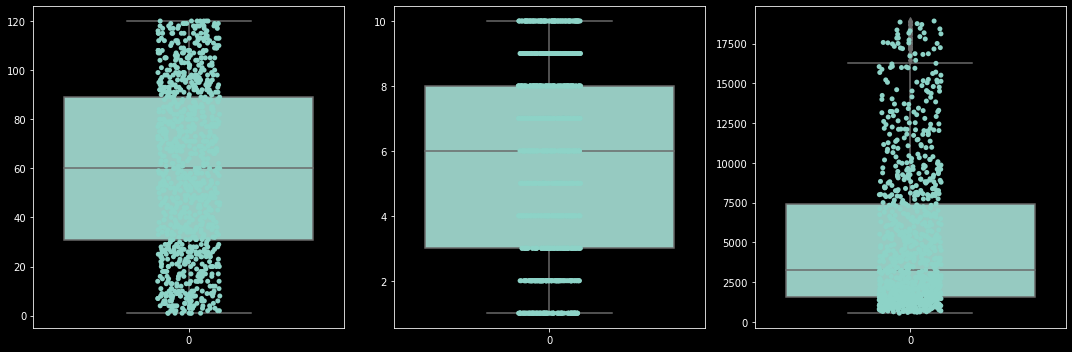

In [12]:
# Criar subplots a figura e o eixo
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

## interar em cada coluna do data frame
for i, column in enumerate(df.columns):
    sns.boxplot(data=df[column], ax=axs[i])
    sns.stripplot(data=df[column], ax=axs[i])


plt.tight_layout()
plt.show()

Aqui podemos notar que a coluna salario_em_reais tem bastante valores de outliers

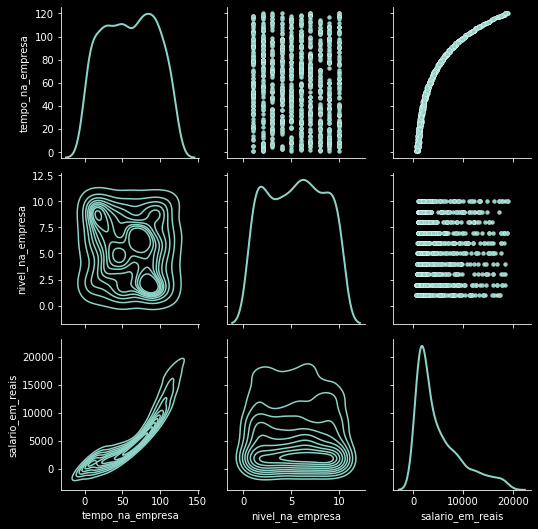

In [13]:
graph = sns.PairGrid(df, diag_sharey=False)
graph.map_upper(sns.scatterplot, s=15)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot, lw=2)

Conseguimos ver aqui que conforme o tempo passe o salario aumenta.

#### 2.2 - Calculando correlação e covariância

In [14]:
matrix_corr = df.corr()
matrix_cov = df.cov()

In [15]:
matrix_corr

tempo_na_empresa  nivel_na_empresa  salario_em_reais
tempo_na_empresa          1.000000         -0.079109          0.907633
nivel_na_empresa         -0.079109          1.000000         -0.012390
salario_em_reais          0.907633         -0.012390          1.000000

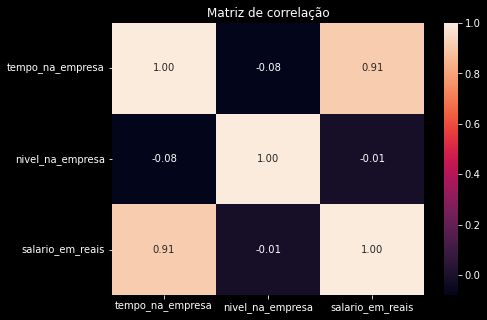

In [16]:
plt.figure(figsize=(7, 5))
plt.title("Matriz de correlação")
sns.heatmap(matrix_corr, annot=True, fmt=".2f")
plt.show()

Como dito antes existe uma correlação bem grande entre tempo de empresa e salario.

In [17]:
matrix_cov

tempo_na_empresa  nivel_na_empresa  salario_em_reais
tempo_na_empresa       1157.882939         -7.778282      1.400980e+05
nivel_na_empresa         -7.778282          8.349260     -1.623947e+02
salario_em_reais     140097.985505       -162.394728      2.057683e+07

Vamos ter que transformar o dataframe utilizando o StandScaler por conta da diferença escala

In [18]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

matrix_cov = np.cov(df_scale, rowvar=False)

In [19]:
matrix_cov

array([[ 1.001001  , -0.07918846,  0.90854169],
       [-0.07918846,  1.001001  , -0.01240204],
       [ 0.90854169, -0.01240204,  1.001001  ]])

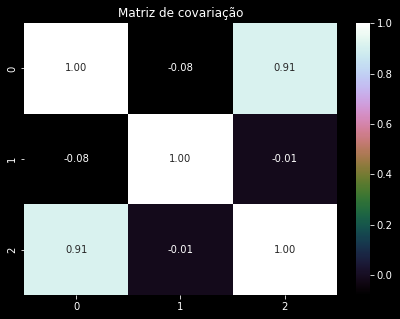

In [20]:
plt.figure(figsize=(7, 5))
plt.title("Matriz de covariação")
sns.heatmap(matrix_cov, annot=True, fmt=".2f", cmap="cubehelix")
plt.show()

Notamos de novo evidencias entre os anos na empresa e o salario que recebe

#### 3.2 - Modelos Polinomiais

Aqui vou rodar 3 modelos diferentes, cada um em um grau diferente dois no modelo numpy e um no sklearn.

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
X = df[["tempo_na_empresa", "nivel_na_empresa"]]
y = df["salario_em_reais"]

In [23]:
## Aqui usemos o sklearn
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model_sk = LinearRegression()
model_sk.fit(X_poly, y)

LinearRegression()

In [24]:
model_sk.coef_

array([  0.        , -83.26402061,  60.34861435,   1.71270433,
         0.16823996,  -1.55219874])

In [25]:
model_sk.intercept_

1653.5719776891638

In [26]:
y_pred = model_sk.predict(X_poly)


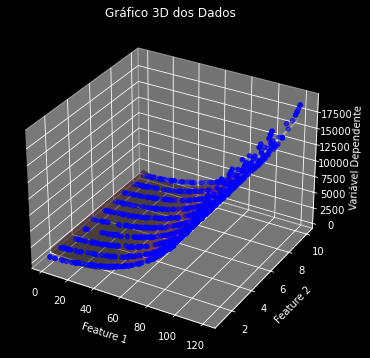

In [27]:
from mpl_toolkits.mplot3d import Axes3D


x1_values = np.linspace(X.values[:, 0].min(), X.values[:, 0].max(), 100)
x2_values = np.linspace(X.values[:, 1].min(), X.values[:, 1].max(), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)
x_mesh = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))
x_poly_mesh = poly.transform(x_mesh)
y_pred_mesh = model_sk.predict(x_poly_mesh)
y_pred_mesh = y_pred_mesh.reshape(x1_mesh.shape)


# Criar figura e eixos 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Plotar os dados
ax.scatter(X.values[:, 0], X.values[:, 1], y, color="blue", label="Dados originais")
ax.plot_surface(x1_mesh, x2_mesh, y_pred_mesh, alpha=0.5, cmap="hot")
# Adicionar rótulos e título
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Variável Dependente")
ax.set_title("Gráfico 3D dos Dados")

# Mostrar o gráfico
plt.show()

Nesse grafico não ficou tão visivel a regressão polinomial da para ver traços bem finos no inicio

Agora vamos ver outros dois modelos no numpy

In [28]:
X.values

array([[ 50,   1],
       [ 49,   4],
       [ 39,  10],
       ...,
       [118,   6],
       [ 94,  10],
       [ 11,  10]], dtype=int64)

In [29]:
modelo2 = np.polyfit(X.values[:, 0], y, 2)
modelo3 = np.polyfit(X.values[:, 0], y, 3)

In [45]:
coefficients2 = np.polyfit(X["tempo_na_empresa"], y, 3)
coefficients3 = np.polyfit(X["tempo_na_empresa"], y, 2) ## modelo x ao quadrado

# Criar o modelo polinomial
modelo2 = np.poly1d(coefficients2)
modelo3 = np.poly1d(coefficients3)


# Imprimir o modelo
print("Modelo Polinomial 2:", modelo2)
print("Modelo Polinomial 3:", modelo3)

Modelo Polinomial 2:          3         2
0.01652 x - 1.255 x + 60.08 x + 503.8
Modelo Polinomial 3:        2
1.721 x - 83.65 x + 1962


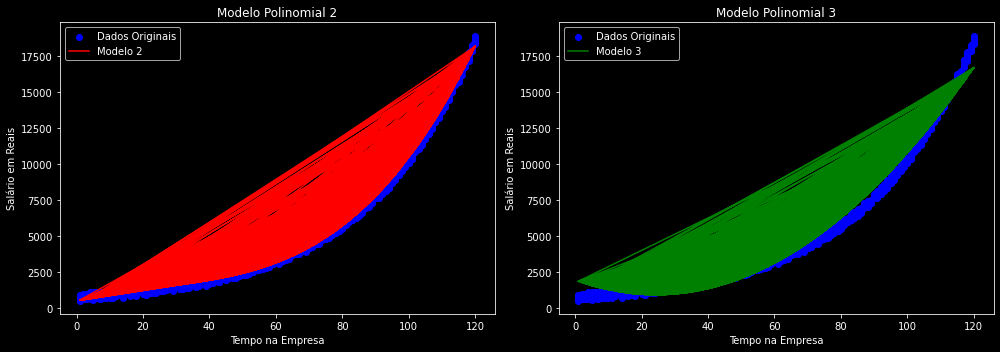

In [31]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(X["tempo_na_empresa"], y, color="blue", label="Dados Originais")
plt.plot(
    X["tempo_na_empresa"], modelo2(X["tempo_na_empresa"]), color="red", label="Modelo 2"
)
plt.xlabel("Tempo na Empresa")
plt.ylabel("Salário em Reais")
plt.title("Modelo Polinomial 2")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X["tempo_na_empresa"], y, color="blue", label="Dados Originais")
plt.plot(
    X["tempo_na_empresa"],
    modelo3(X["tempo_na_empresa"]),
    color="green",
    label="Modelo 3",
)
plt.xlabel("Tempo na Empresa")
plt.ylabel("Salário em Reais")
plt.title("Modelo Polinomial 3")
plt.legend()

plt.tight_layout()
plt.show()

Aqui notamos que o modelo 2 consegue descrever melhor os dados ele tem grau 3

#### 4.2 – Análise do resíduos

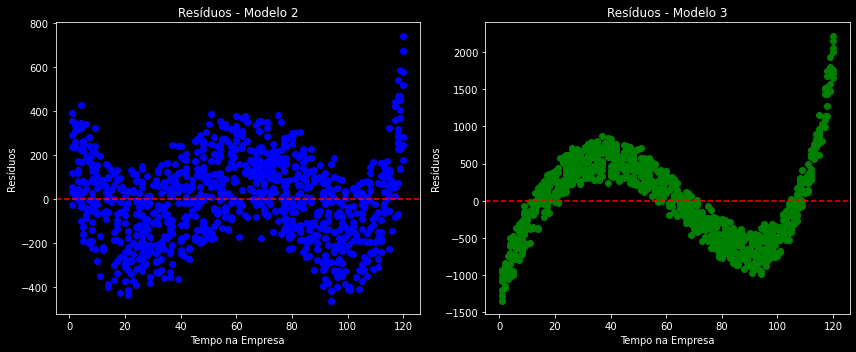

In [32]:
residuos2 = y - modelo2(X["tempo_na_empresa"])
residuos3 = y - modelo3(X["tempo_na_empresa"])

# Plotar os resíduos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X["tempo_na_empresa"], residuos2, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Tempo na Empresa")
plt.ylabel("Resíduos")
plt.title("Resíduos - Modelo 2")

plt.subplot(1, 2, 2)
plt.scatter(X["tempo_na_empresa"], residuos3, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Tempo na Empresa")
plt.ylabel("Resíduos")
plt.title("Resíduos - Modelo 3")

plt.tight_layout()
plt.show()

Conseguimos notar drasticamente o os risiduos o modelos dois parece tar mais ajustado

#### 5.2 – Análise de multicolinearidade

In [33]:

vif2 = [
    variance_inflation_factor(X[["tempo_na_empresa", "nivel_na_empresa"]].values, i)
    for i in range(X[["tempo_na_empresa", "nivel_na_empresa"]].shape[1])
]
print("VIF para Modelo Polinomial 2:")
print(vif2)

# Calcular o fator de inflação da variância para o modelo 3
vif3 = [
    variance_inflation_factor(X[["tempo_na_empresa", "nivel_na_empresa"]].values, i)
    for i in range(X[["tempo_na_empresa", "nivel_na_empresa"]].shape[1])
]
print("VIF para Modelo Polinomial 3:")
print(vif3)

VIF para Modelo Polinomial 2:
[2.285929044062148, 2.285929044062148]
VIF para Modelo Polinomial 3:
[2.285929044062148, 2.285929044062148]


parece que as variáveis independentes são independentes umas das outras e não há problemas de multicolinearidade nos modelos.

#### 6.2 – Análise de outlier 

Agora vamos fazer os residuos com o z-score avaliando no limiar como 3

In [34]:
residuos2

0     -146.389316
1       12.560446
2      241.175094
3     -153.144112
4      243.745904
          ...    
995    262.503347
996   -200.472251
997    255.569613
998    158.958946
999    197.113249
Name: salario_em_reais, Length: 1000, dtype: float64

In [35]:
residuos3

0       206.277168
1       394.705492
2       841.477716
3       169.047008
4       193.264036
          ...     
995    -549.596455
996    -792.933322
997    1457.882640
998    -365.917243
999     -18.379096
Name: salario_em_reais, Length: 1000, dtype: float64

In [40]:
## Calculando o zscore
z_score2 = np.abs(st.zscore(residuos2))
z_score3 = np.abs(st.zscore(residuos3))

## limiar
limiar = 3

id_out2 = np.where(z_score2 > limiar)[0]
id_out3 = np.where(z_score3 > limiar)[0]



In [47]:
if len(id_out2)> 0:
    print("Indices do outliers referente ao Modelo 2 : ", id_out2)
else:
    print("Nenhum outlier encontrado")

Indices do outliers referente ao Modelo 2 :  [189 224 424 542]


In [48]:
if len(id_out3) > 0:
    print("Indices do outliers referente ao Modelo 3 : ", id_out3)
else:
    print("Nenhum outlier encontrado")

Indices do outliers referente ao Modelo 3 :  [ 54  76 189 224 381 388 424 542 621 643 902]


Aqui podemos ver qual modelo tem mais outliers. $\newline$
Que é o modelo 3 ou seja o modelo 2 é melhor. 

#### 7 - Seleção de Modelos
Agora vamos utilizar o Lasso para ter certeza de escolher o melhor modelo

In [102]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [88]:
lasso_model2 = Lasso(alpha=0.15)
lasso_model3 = Lasso(alpha=0.15)

In [89]:
modelo2

poly1d([ 1.65180770e-02, -1.25519483e+00,  6.00796667e+01,  5.03763431e+02])

In [92]:
poly3 = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

lasso_model3.fit(X_poly, y)
y_pred3 = lasso_model3.predict(X_poly)

In [91]:
lasso_model3.coef_

array([  0.        , -83.26697862,  59.91104282,   1.71268334,
         0.16920662,  -1.51893295])

In [93]:
poly2 = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

lasso_model2.fit(X_poly, y)

y_pred2 = lasso_model2.predict(X_poly)


In [94]:
lasso_model2.coef_

array([  0.        , -83.26697862,  59.91104282,   1.71268334,
         0.16920662,  -1.51893295])

In [95]:
model_sk.coef_

array([  0.        , -83.26402061,  60.34861435,   1.71270433,
         0.16823996,  -1.55219874])

Não conseguimos identificar tanta diferença dentre dos coeficientes então decidi usar o MSE para decidir

In [98]:
mse2 = mean_squared_error(y, y_pred2)
mse3 = mean_squared_error(y, y_pred3)

In [99]:
print("MSE para o modelo polinomial de grau 2:", mse2)
print("MSE para o modelo polinomial de grau 3:", mse3)

MSE para o modelo polinomial de grau 2: 304447.0983442594
MSE para o modelo polinomial de grau 3: 304447.0983442594


In [103]:
mae2 = mean_absolute_error(y, y_pred2)
mae3 = mean_absolute_error(y, y_pred3)

In [104]:
print("MAE para o modelo polinomial de grau 2:", mse2)
print("MAE para o modelo polinomial de grau 3:", mse3)

MAE para o modelo polinomial de grau 2: 304447.0983442594
MAE para o modelo polinomial de grau 3: 304447.0983442594


Como não obtive tanta relevancia no MSE e no MAE então considerando os graficos vistos anteriormente o modelo 2 é melhor.